# Exporatory Data Analysis 

Before we build our machine learning models on a dataset, we need to be familiar with our data. We need to have an intuition on how to interpret the results of the models. Exploratory data analysis, or EDA, is a crucial part of Data Science process. 

Some of the most important/interesting business insights come not from machine learning models, but from exploring the distribution of our data. We can utilize descriptive analytics to gain valuable company insight--think about questions like "who is my most profitable customer segment?" or "is there a seasonality to our customer churn rate?". The ability to ask good questions and basic visualizations, sometimes will get the job done vs. using machine learning models. 

Understanding your data distribution can be done in a few different ways. Generally, we'll use high-level descriptive statistics, followed by visualizations. It's common to find interesting things in the data that leads to further questions for investigation. 

Using pandas `.describe()` method, you'll be able to easily extract the count, mean, median, min, max, and quartile values for every column in the DataFrame. It's useful for answering questions like "how much variance can I expect in column x?" (i.e. how far is column x from the dataset mean?) 

## Visualizing Distributions - Histograms 
The simplest way to understand the distribution of a dataset is to visualize it. Pandas has an built-in `.hist()` method. 

- insert picture 

## Visualizing Distributions - Kernel Density Estimation (KDE) plots
KDE plot is a non-parametric way of estimating the probability density function (PDF) of a random variable. It's normally overlaid with a histogram to create a line that visualizes the probability mass for each value in the histogram.

## Joint Plots
The joint plot allows us to visualize a scatter plot of two different columns, a KDE plot, and a simple linear regression line. We can use the seaborn library to create them. `sns.jointplot()`

## Interpreting Our EDA
The goal of EDA is not pretty visualizations, but insight to our data! Use visualization as a tool, not a goal. The goal is to ask good questions and see if you can answer it by exploring the dataset. 

# Exploring our Data

In [27]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')

# importing our dataset 
df = pd.read_csv('walmart_dataset-Copy1.csv')
df.head(3)

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,binned_markdown_1,binned_markdown_2,binned_markdown_3,binned_markdown_4,binned_markdown_5
0,1,1,24924.50,False,A,0.283436,-1.301205,-1.56024,0.40349,0.913194,NaN,NaN,NaN,NaN,NaN
1,1,2,50605.27,False,A,0.283436,-1.301205,-1.56024,0.40349,0.913194,NaN,NaN,NaN,NaN,NaN
2,1,3,13740.12,False,A,0.283436,-1.301205,-1.56024,0.40349,0.913194,NaN,NaN,NaN,NaN,NaN


In [2]:
# describing dataset using 5 point statistics 
df.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment
count,97839.000000,97839.000000,97839.000000,9.783900e+04,9.783900e+04,9.783900e+04,9.783900e+04,9.783900e+04
mean,5.474545,43.318861,17223.235591,1.092260e-16,2.442107e-13,4.830299e-13,-1.535671e-14,1.793500e-12
std,2.892364,29.673645,25288.572553,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,1.000000,1.000000,-1098.000000,-1.611999e+00,-3.843452e+00,-1.691961e+00,-1.958762e+00,-2.776898e+00
25%,3.000000,19.000000,2336.485000,-1.028620e+00,-7.087592e-01,-1.053793e+00,-1.266966e-01,-6.503157e-01
50%,6.000000,36.000000,7658.280000,2.834360e-01,1.340726e-01,1.180741e-01,4.995210e-01,-4.621274e-02
75%,8.000000,71.000000,20851.275000,1.113495e+00,8.680410e-01,8.243739e-01,6.346144e-01,7.089160e-01
max,10.000000,99.000000,693099.360000,1.171380e+00,1.738375e+00,2.745691e+00,8.517705e-01,2.361469e+00


Observations:
- Seeing some of the categorical features as continuous, like store and dept.
- We won't be considering the meand and standard deviation values for such variables. 

In [7]:
df.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'binned_markdown_1',
       'binned_markdown_2', 'binned_markdown_3', 'binned_markdown_4',
       'binned_markdown_5'],
      dtype='object')

## Use pandas `.hist()` to plot histograms for all the features in the dataset

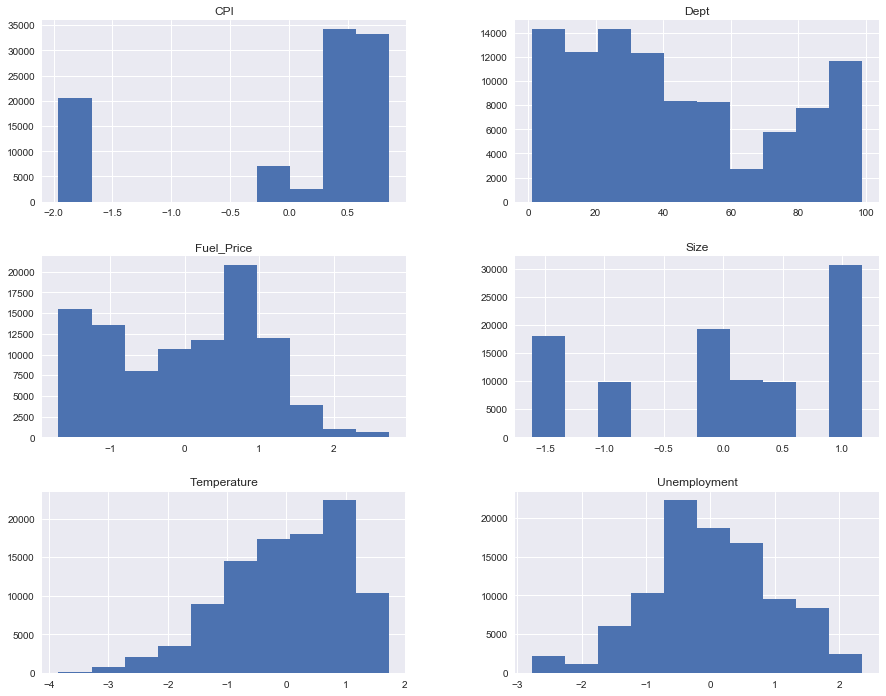

In [50]:
walmart = df[['Size','Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Dept']]

walmart.hist(figsize= (15,12));

## Use only continuous variable for visualizing probability densities and KDEs



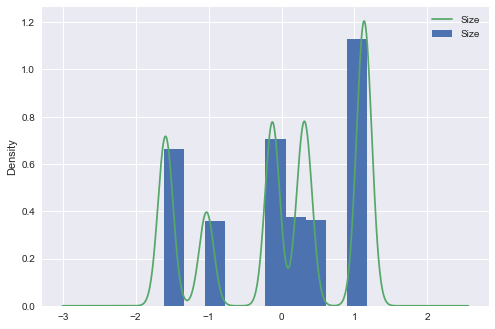

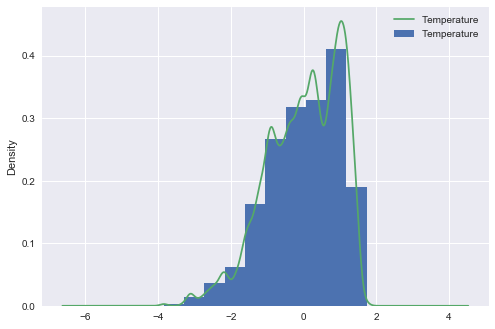

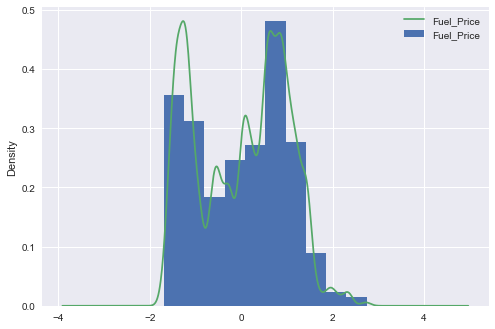

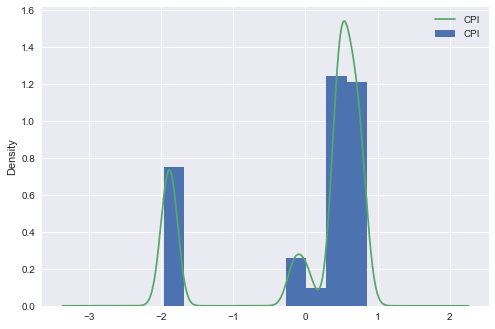

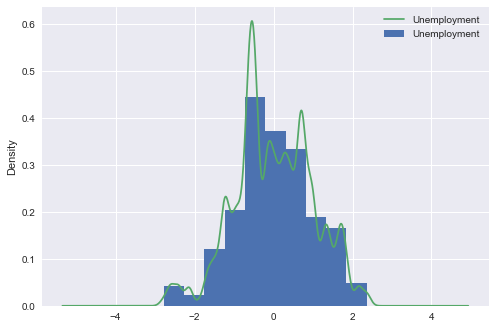

In [28]:
for column in ['Size','Temperature', 'Fuel_Price', 'CPI', 'Unemployment']:
    df[column].plot.hist(normed=True)
    df[column].plot.kde(label=column)
    plt.legend()
    plt.show()

Observations: 
- A number of distributions are multimodal i.e. they have more than one typical values. 


## Use joint plots to check for linearity assumptions between our predictors and target variable 

We're using seaborns `jointplot()` which uses scatter plots, distributions, kde and simple regression line. This will allow to visually inspect lineratity as well as normality assumptions in one go. 

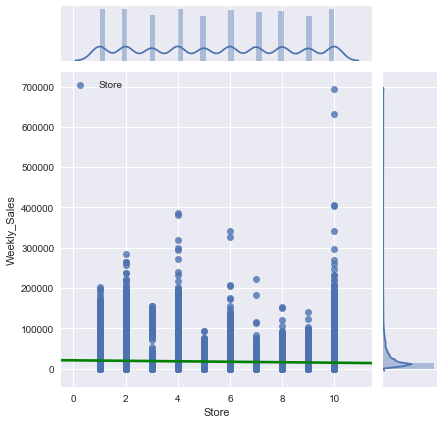

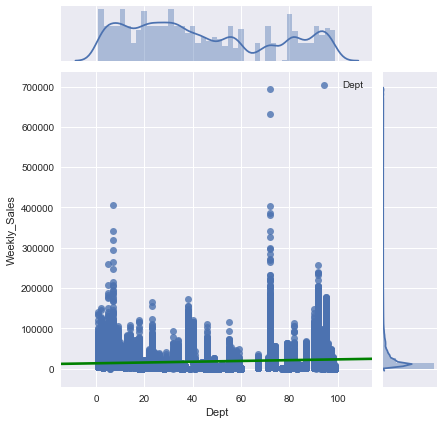

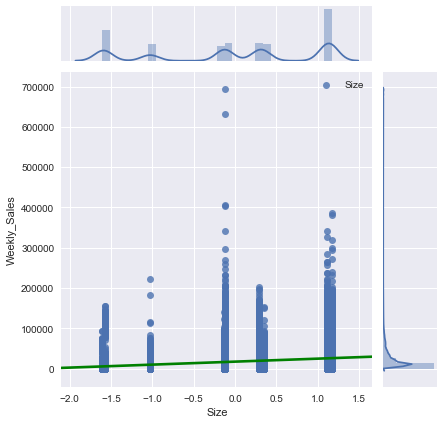

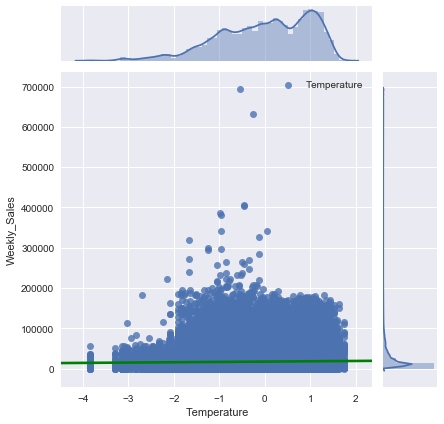

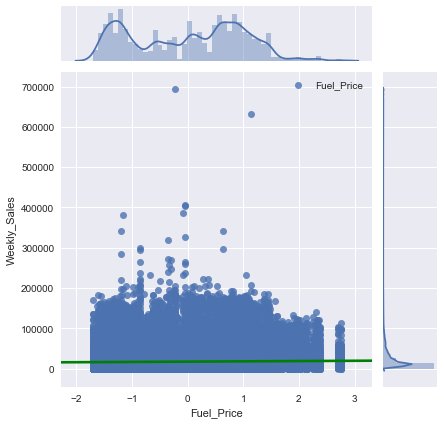

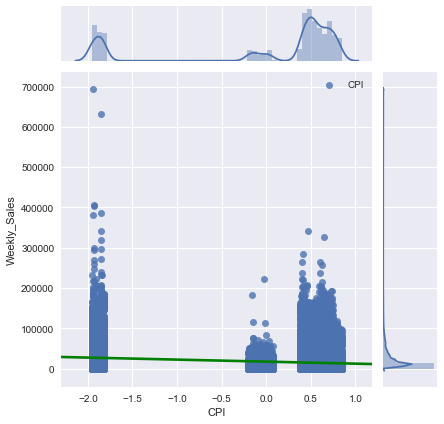

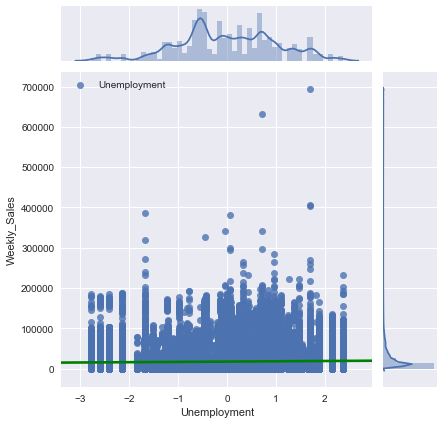

In [49]:
for column in ['Store','Dept','Size','Temperature', 'Fuel_Price', 'CPI', 'Unemployment']:
    sns.jointplot(x=column, y='Weekly_Sales',
             data=df,
             kind='reg',
             label=column,
             joint_kws={'line_kws':{'color':'green'}})
    plt.legend()
    plt.show();
            

observations: 
- Our joint plots further confirm our observations we made earlier
- Some are almost unformalily distributed, while others are multimodal 
- The predictors does not hold strong with it's normality assumption
- Store, dept, fuel, temperature, and unemployment almost has no clear relationship with sales
- CPI has a weak negative relationship with sales 
- Size has a weak positive relationship with sales

In summary, we performed basic EDA on the walmart dataset to check for regression assumptions. As, shown above, our assumptions don't hold strong, but moving forward to building a basic model and further pre-processing the data, might bring forth further insight on our feature to target relationship.

# [Practical Advice for Analysis](http://www.unofficialgoogledatascience.com/2016/10/practical-advice-for-analysis-of-large.html)

Three genereal ideas: 
- Technical
- Process 
- Social 

## Technical
### Look at your distributions
- Typical summary metrics or descriptive statistics (means, median, standard deviation, etc.) 
- Use histograms, CDF-s (cumulative distribution function), Q-Q plos (for normality), etc.) 
- Discern if features of the data has relationships to its target or multi-modal behavior or a significant class of outliers that needs to be summarized, based on your approach

### Consider outliers
- 